In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Resultsd.csv')

In [3]:
top_pizzas = df['pizza_type_id'].value_counts().nlargest(10).index
df = df[df['pizza_type_id'].isin(top_pizzas)]

In [4]:
grouped = df.groupby(['pizza_type_id', 'size'])['order_id'].count().reset_index()

In [5]:
pivot = grouped.pivot(index='pizza_type_id', columns='size', values='order_id')

In [6]:
sorted_pizzas = pivot.sum(axis=1).sort_values().index

<Figure size 1440x720 with 0 Axes>

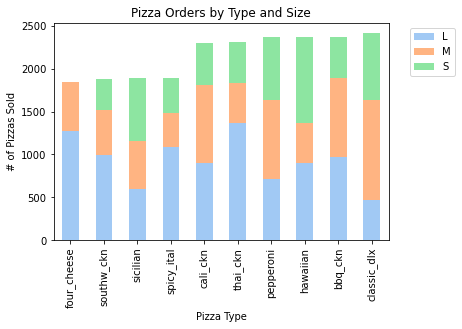

In [7]:
plt.figure(figsize=(20,10))
sns.set_palette('pastel')
pivot.loc[sorted_pizzas].plot(kind='bar', stacked=True)
plt.title('Pizza Orders by Type and Size')
plt.xlabel('Pizza Type')
plt.ylabel('# of Pizzas Sold')
plt.legend(title='Size')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')